In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
eh= pd.read_csv('train.csv',nrows=10000)
eh.head(100)

eh.head(100)

In [0]:
eh.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [0]:
eh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
date_time                    10000 non-null object
site_name                    10000 non-null int64
posa_continent               10000 non-null int64
user_location_country        10000 non-null int64
user_location_region         10000 non-null int64
user_location_city           10000 non-null int64
orig_destination_distance    6271 non-null float64
user_id                      10000 non-null int64
is_mobile                    10000 non-null int64
is_package                   10000 non-null int64
channel                      10000 non-null int64
srch_ci                      9993 non-null object
srch_co                      9993 non-null object
srch_adults_cnt              10000 non-null int64
srch_children_cnt            10000 non-null int64
srch_rm_cnt                  10000 non-null int64
srch_destination_id          10000 non-null int64
srch_destination_type_id     10000 non-n

In [0]:
eh.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
exp=eh[['user_location_country','hotel_cluster','is_package','hotel_country','srch_children_cnt','srch_adults_cnt','srch_rm_cnt','is_booking']]
exp.head()

,user_location_country,hotel_cluster,is_package,hotel_country,srch_children_cnt,srch_adults_cnt,srch_rm_cnt,is_booking
0,66,1,1,50,0,2,1,0
1,66,1,1,50,0,2,1,1
2,66,1,0,50,0,2,1,0
3,66,80,0,50,0,2,1,0
4,66,21,0,50,0,2,1,0


In [0]:
pa =exp[["is_package"]].astype(int)
package = pa.values.tolist()
pal=[]
for i in range(len(package)):
    if package[i]==[0]:
        pal.append(1)
    else:
        pal.append(2)
        
        
bk =exp[["is_booking"]].astype(int)
booking = bk.values.tolist()
bkl=[]
for i in range(len(booking)):
    if booking[i]==[0]:
        bkl.append(1)
    else:
        bkl.append(2)

ct= exp[["hotel_cluster"]].astype(int)
country = ct.values.tolist()
ctl=[]
for i in range(len(country)):
    if country[i]< [50]:
        ctl.append(1)
    else:
        ctl.append(2)

In [0]:
ht= exp[["user_location_country"]].astype(int)
hotel = ht.values.tolist()
htl=[]
for i in range(len(hotel)):
    if hotel[i]< [25]:
        htl.append(1)
    elif hotel[i]<[50]:
        htl.append(2)
    elif hotel[i]<[75]:
        htl.append(3)
    else:
        htl.append(4)

In [0]:
hc= exp[["hotel_country"]].astype(int)
hotelc = hc.values.tolist()
htcl=[]
for i in range(len(hotelc)):
    if hotelc[i]< [105]:
        htcl.append(1)
    else:
        htcl.append(2)

In [0]:
cd= exp[["srch_children_cnt"]].astype(int)
child = cd.values.tolist()
cdl=[]
for i in range(len(child)):
    if child[i]== [0]:
        cdl.append(1)
    elif child[i]<[3]:
        cdl.append(2)
    else:
        cdl.append(3)

In [0]:
ad= exp[["srch_adults_cnt"]].astype(int)
adult = ad.values.tolist()
adl=[]
for i in range(len(adult)):
    if adult[i]< [3]:
        adl.append(1)
    else:
        adl.append(2)

In [0]:
rm= exp[["srch_rm_cnt"]].astype(int)
room = ad.values.tolist()
rml=[]
for i in range(len(room)):
    if room[i]< [2]:
        rml.append(1)
    else:
        rml.append(2)

In [0]:

data={'user_location_country':ctl,'hotel_cluster':htl,'is_package':pal, 'hotel_country':htcl,'srch_children_cnt':cdl, 'srch_adults_cnt':adl, 'srch_rm_cnt':rml, 'is_booking':bkl}
d=pd.DataFrame(data)
d.head()

,user_location_country,hotel_cluster,is_package,hotel_country,srch_children_cnt,srch_adults_cnt,srch_rm_cnt,is_booking
0,1,3,2,1,3,1,2,1
1,1,3,2,1,3,1,2,2
2,1,3,1,1,3,1,2,1
3,2,3,1,1,3,1,2,1
4,1,3,1,1,3,1,2,1


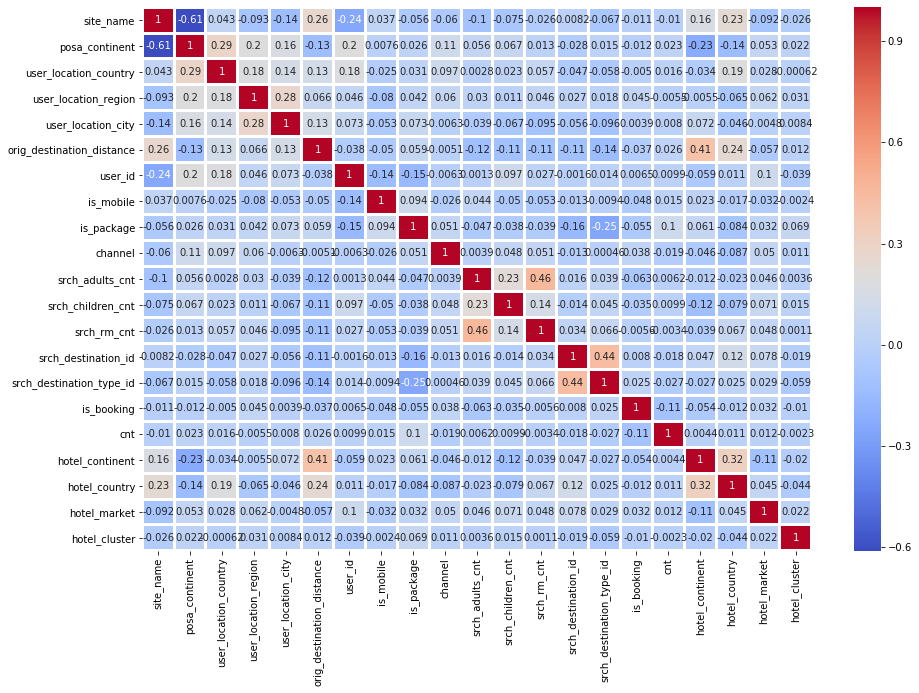

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(eh.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

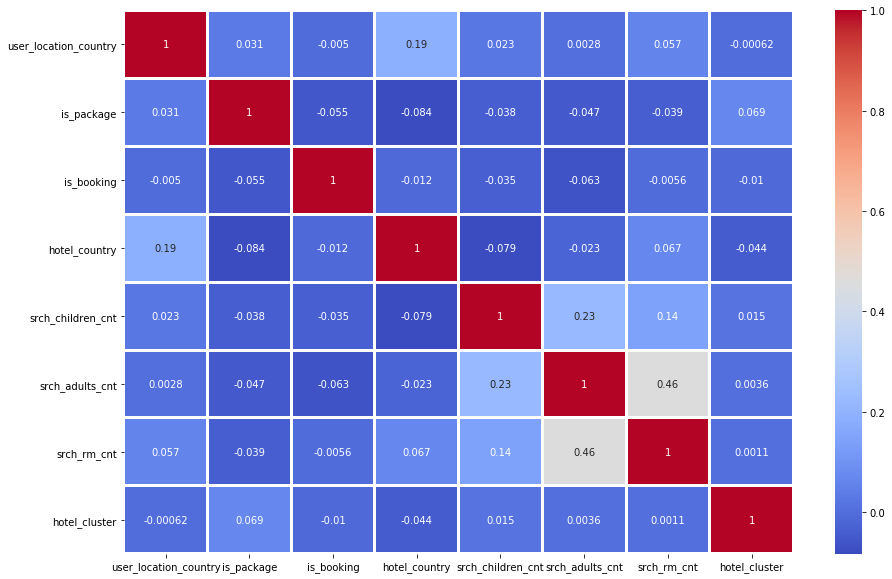

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(exp.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

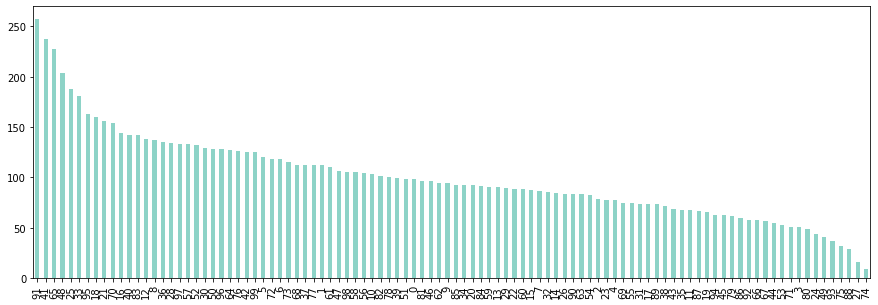

In [0]:
eh["hotel_cluster"].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))


In [0]:
exp.to_csv(r'.\Downloads\exp_train.csv')
eh.to_csv(r'.\Downloads\exp_train24.csv')

PermissionError: [Errno 13] Permission denied: '.\\Downloads\\exp_train24.csv'

In [0]:
eh_test= pd.read_csv('test.csv')

In [0]:
exp_test=eh_test[['user_location_country','is_package','hotel_country','srch_children_cnt','srch_adults_cnt','srch_rm_cnt']]
exp_test.head()
exp.to_csv(r'.\Downloads\exp_test.csv')

In [0]:
d.to_csv(r'.\Downloads\classified.csv')